# Imported Libs

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score

import statistics

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split, cross_val_score \
,GridSearchCV, KFold, RepeatedKFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit \
, RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier, RidgeClassifier, ElasticNet, LogisticRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Prep

In [2]:
#get data
data = pd.read_csv('./data/creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df_test = data.sample(frac=0.2, random_state=12)
df_train = data.drop(df_test.index, axis=0)

In [9]:
df_test.shape, df_train.shape

((56961, 31), (227846, 31))

# Exploratory Data Analysis

In [10]:
df_train_copy = df_train.copy()

In [11]:
classes = df_train_copy['Class'].value_counts()
classes

0    227447
1       399
Name: Class, dtype: int64

In [12]:
df_train_copy.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
normal_transaction = classes[0]/df_train_copy['Class'].count()*100
fraud_transaction = classes[1]/df_train_copy['Class'].count()*100

print(f'% of normal transactions in training set = {normal_transaction}')
print(f'% of fraud transactions in training set = {fraud_transaction}')

% of normal transactions in training set = 99.82488171835362
% of fraud transactions in training set = 0.1751182816463752


In [14]:
#outliers

def outliers_detection(df,columns):
    outliers = []
    for column in columns:
        std= df[column].std()
        mean= df[column].mean()
        outlier_data= df[(df[column] > mean + 2 * std) |
                         (df[column] < mean - 2 * std)]
        outliers.append(outlier_data[column].count())
    return outliers

In [15]:
outliers_data = pd.DataFrame(index=(list(df_train_copy)))
outliers_data['min'] = df_train_copy.min()
outliers_data['max'] = df_train_copy.max()
outliers_data['outliers'] = outliers_detection(df_train_copy,list(df_train_copy))
outliers_data['%outliers'] = outliers_data['outliers'] / len(df_train_copy) * 100

outliers_data

,min,max,outliers,%outliers
Time,0.000000,172792.000000,0,0.000000
V1,-56.407510,2.454930,6684,2.933560
V2,-72.715728,22.057729,8050,3.533088
V3,-48.325589,9.382558,6297,2.763709
V4,-5.683171,16.875344,12917,5.669180
V5,-113.743307,34.801666,7996,3.509388
V6,-26.160506,73.301626,15886,6.972253
V7,-43.557242,120.589494,5946,2.609657
V8,-73.216718,19.168327,6424,2.819448
V9,-13.434066,15.594995,11377,4.993285


In [16]:
df_to_visualize = df_train_copy.copy()

In [17]:
# Create a scatter plot to observe the distribution of classes with time
Delta_Time = pd.to_timedelta(df_to_visualize['Time'], unit='s')
#Create derived columns Mins and hours
df_to_visualize['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df_to_visualize['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df_to_visualize['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

df_to_visualize

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Hour,Time_Min
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0,0,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0,1,23,59
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0,1,23,59
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,23,59
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,23,59


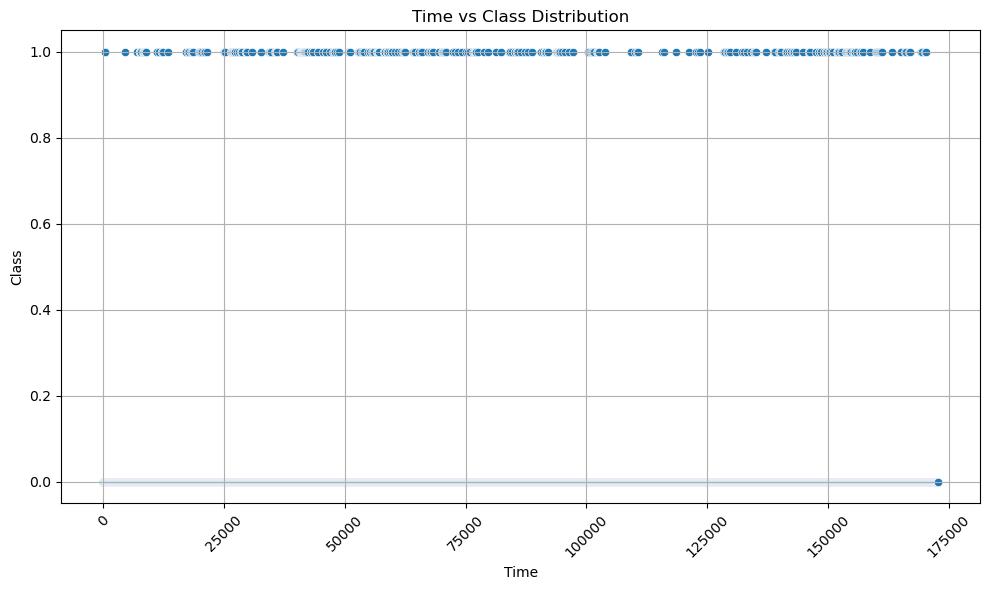

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time',y='Class',data=df_to_visualize ,marker='o', linestyle='-')
plt.title('Time vs Class Distribution')
plt.xlabel('Time')
plt.ylabel('Class')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

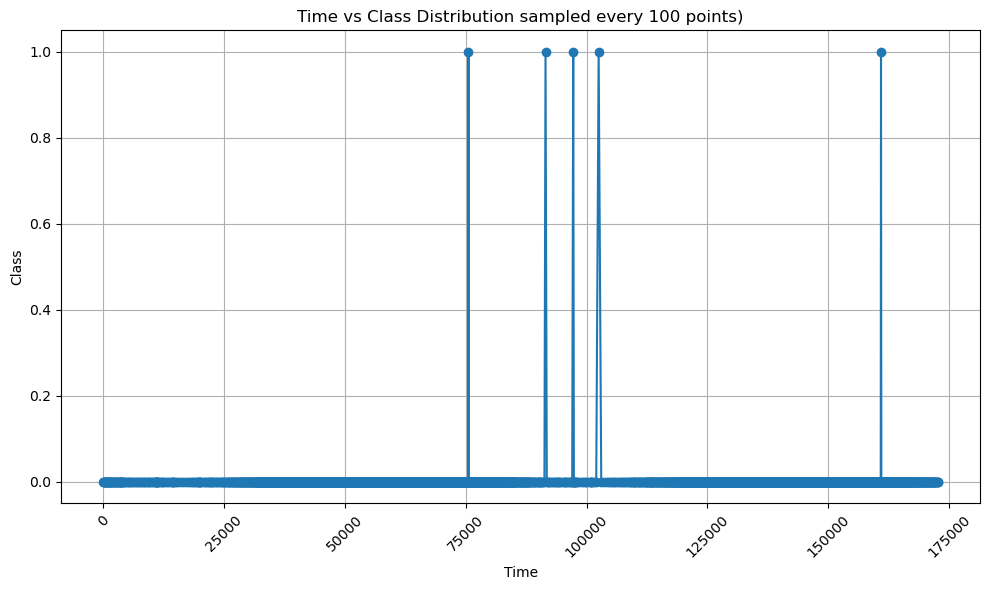

In [19]:
sampled_df = df_to_visualize.iloc[::100,:]
plt.figure(figsize=(10, 6))
plt.plot(sampled_df['Time'], sampled_df['Class'], marker='o', linestyle='-')
plt.title('Time vs Class Distribution sampled every 100 points)')
plt.xlabel('Time')
plt.ylabel('Class')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [20]:
fraud = df_to_visualize.loc[df_to_visualize.Class == 1]
normal = df_to_visualize.loc[df_to_visualize.Class == 0]

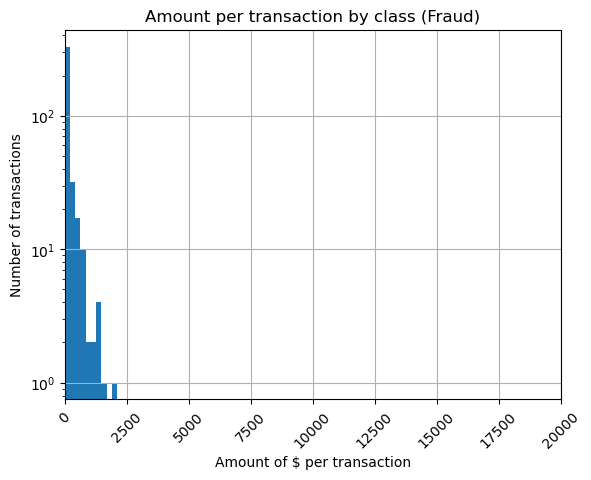

In [21]:
plt.hist(fraud['Amount'])
plt.title('Amount per transaction by class (Fraud)')
plt.xlabel('Amount of $ per transaction')
plt.ylabel('Number of transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

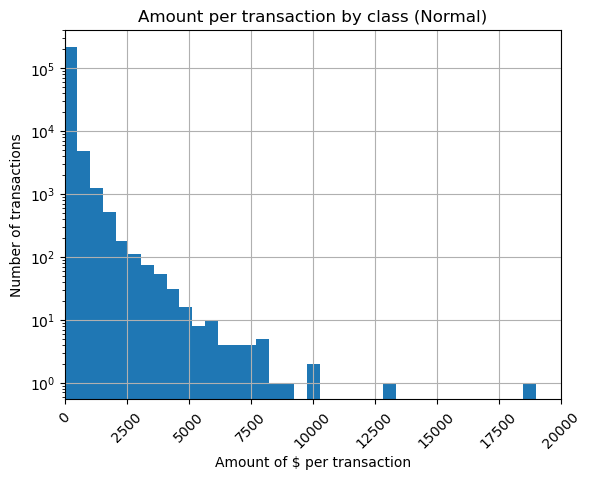

In [22]:
plt.hist(normal['Amount'], bins=50)
plt.title('Amount per transaction by class (Normal)')
plt.xlabel('Amount of $ per transaction')
plt.ylabel('Number of transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

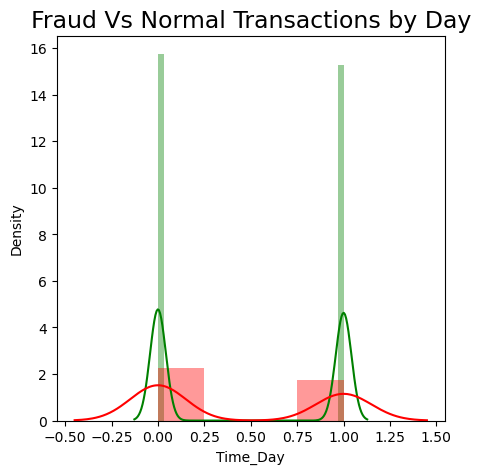

In [23]:
#The fraud Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df_to_visualize[df_to_visualize['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df_to_visualize[df_to_visualize['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

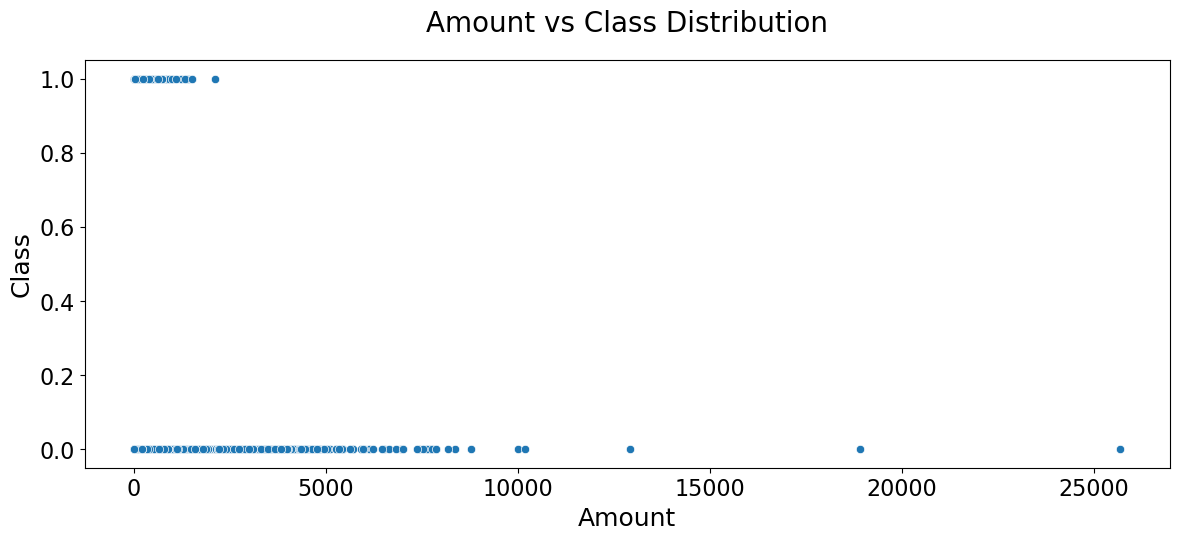

In [24]:
# Create a scatter plot to observe the distribution of classes with Amount
fig = plt.figure(figsize=(14, 18))


# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x='Amount', y='Class',  data=df_to_visualize)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)
plt.show()

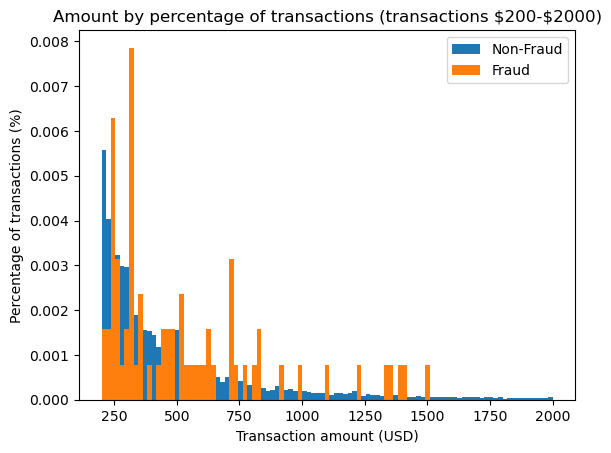

In [25]:
bins = np.linspace(200, 2000, 100)
plt.hist(normal.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

In [26]:
distribution_data = df_to_visualize.copy()
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
distribution_data.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
distribution_data.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

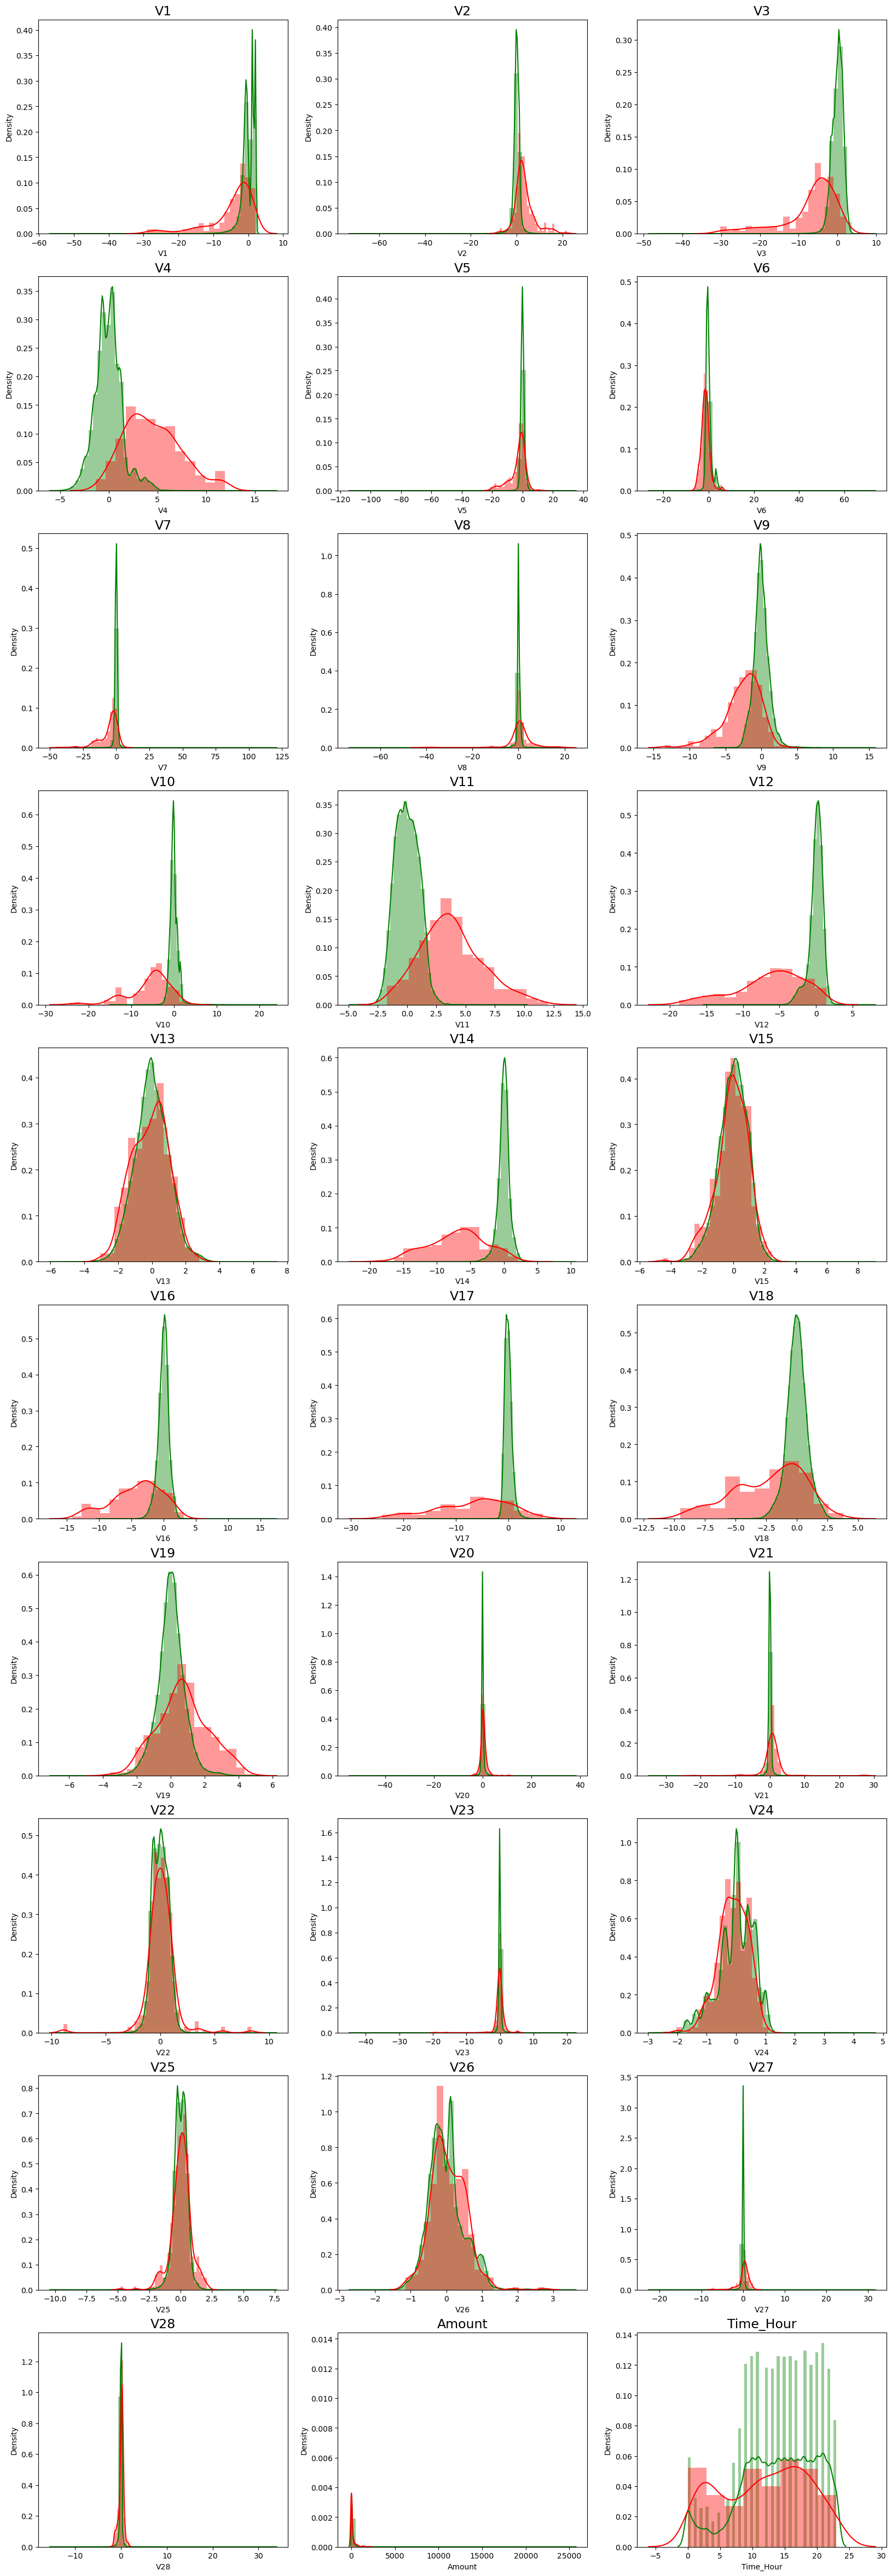

In [27]:
column_list = list(distribution_data.drop('Class',axis=1))
normal_data = distribution_data.Class == 0
fraud_data = distribution_data.Class == 1
plt.figure(figsize=(20, 60))
for n, col in enumerate(column_list):
    plt.subplot(10,3,n+1)
    sns.distplot(distribution_data[col][normal_data], color='green')
    sns.distplot(distribution_data[col][fraud_data], color='red')
    plt.title(col, fontsize=17)
plt.show()

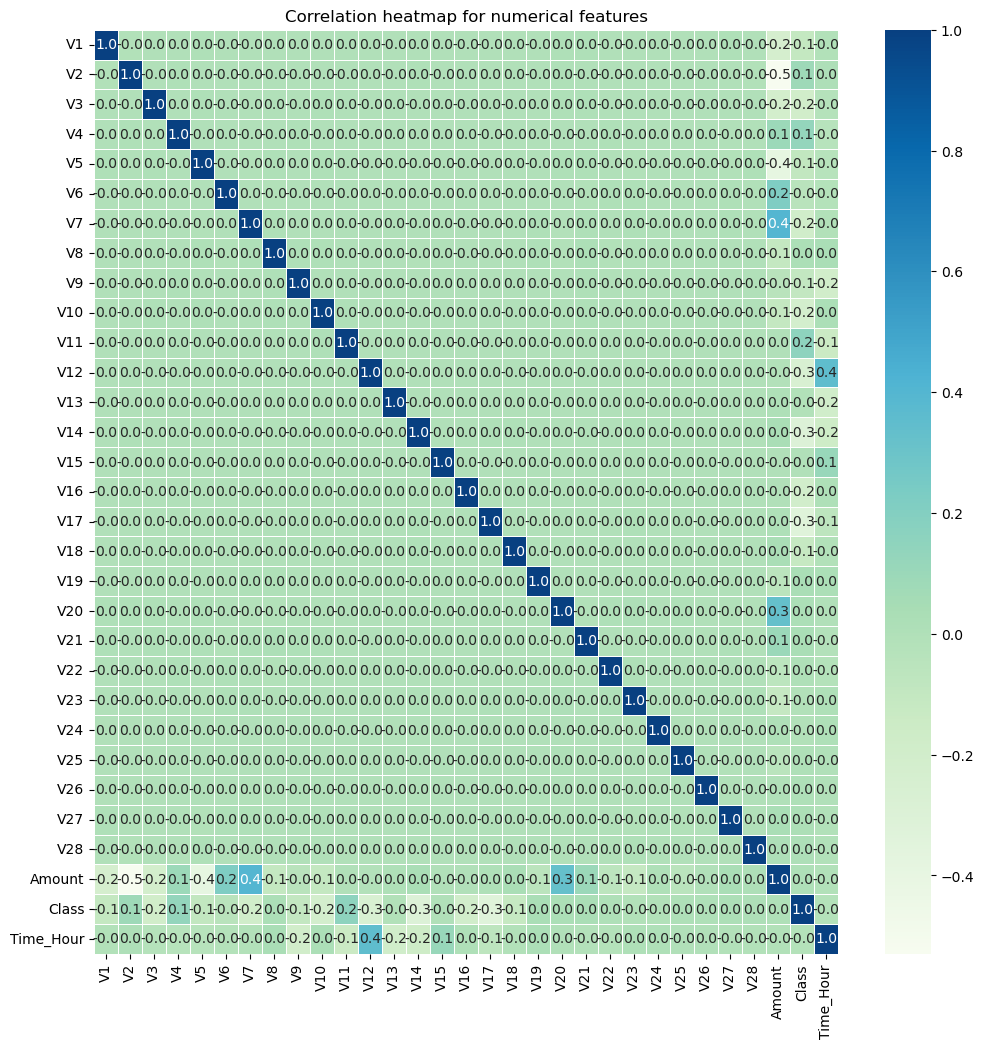

In [28]:
#correlation check
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(distribution_data.select_dtypes(include=['int64', 'float64']).corr(), annot=True , cmap='GnBu' , fmt='.1f' , linewidth=.6)
plt.title('Correlation heatmap for numerical features')
plt.show()

# Data Preparation

In [29]:
data_for_model = distribution_data.copy()

In [30]:
#highly unbalanced
data_for_model['Class'].value_counts()

0    227447
1       399
Name: Class, dtype: int64

In [31]:
data_for_model.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008276,-0.005970,0.01191,-0.009360,0.003006,0.002463,0.010488,-0.002048,0.003702,0.009927,...,-0.001216,0.000036,0.000336,0.000315,-0.000050,0.001032,-0.000531,-0.000030,88.551303,14.047330
1,-4.718939,3.462761,-6.90128,4.500168,-3.073324,-1.444001,-5.468161,0.691546,-2.572412,-5.642899,...,0.586867,0.063155,-0.075612,-0.100498,0.031985,0.060058,0.170473,0.070018,126.636767,11.824561


In [32]:
fraud_data_fm = data_for_model.loc[data_for_model.Class == 1]
normal_data_fm = data_for_model.loc[data_for_model.Class == 0]

In [33]:
print(fraud_data_fm.shape)
print(normal_data_fm.shape)

(399, 31)
(227447, 31)


In [34]:
#The data is highly unbalanced so we will build a sample dataset containing 
#a nearly similar distribution of normal transactions and Fraudulent Transactions

normal_sample = normal_data_fm.sample(n=700)
new_data = pd.concat([normal_sample, fraud_data_fm], axis=0)
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
103075,1.217740,0.224428,0.540399,0.501381,-0.391260,-0.659139,-0.017811,-0.077885,-0.266434,0.093085,...,-0.604166,0.119729,0.333499,0.199152,0.076087,-0.030636,0.009561,1.79,0,19
230070,1.945070,-0.092519,-2.326725,0.111179,0.760207,-1.076639,0.863503,-0.448735,0.001407,0.079888,...,0.701590,-0.215234,-0.512962,0.587892,-0.409351,-0.049823,-0.070895,82.63,0,16
180818,-0.089189,-0.131826,0.438551,-1.345834,1.547177,4.446923,-0.987918,1.082316,-1.487134,0.559475,...,0.970242,-0.367871,0.778926,0.318706,0.505359,0.138323,0.073268,19.95,0,10
11964,1.061662,-0.465585,1.226568,0.253467,-0.753072,0.919268,-1.025993,0.427126,2.303447,-0.731980,...,-0.305272,0.136545,-0.275365,-0.086951,0.945988,-0.036805,-0.008126,20.00,0,5
92291,1.478200,-0.692623,-1.170372,-1.829521,1.479297,3.184064,-1.083593,0.764310,-0.930882,0.694537,...,0.052797,-0.076854,1.024731,0.661505,-0.192136,0.007954,0.008280,6.00,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276071,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,0.249311,...,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1,22
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,22
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,23
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,23


In [35]:
new_data['Class'].value_counts()

0    700
1    399
Name: Class, dtype: int64

In [36]:
features_train = new_data.drop(['Class'], axis=1)
target_train = new_data['Class']

In [37]:
# power_t = PowerTransformer()
# power_t.fit(features_train)
# features_train_pt = power_t.transform(features_train)

In [38]:
# features_train_pt_df = pd.DataFrame(data=features_train_pt, columns=list(features_train.columns.values))

In [39]:
train_X, test_X, train_y, test_y = train_test_split(features_train, target_train, random_state=12, test_size=0.20)

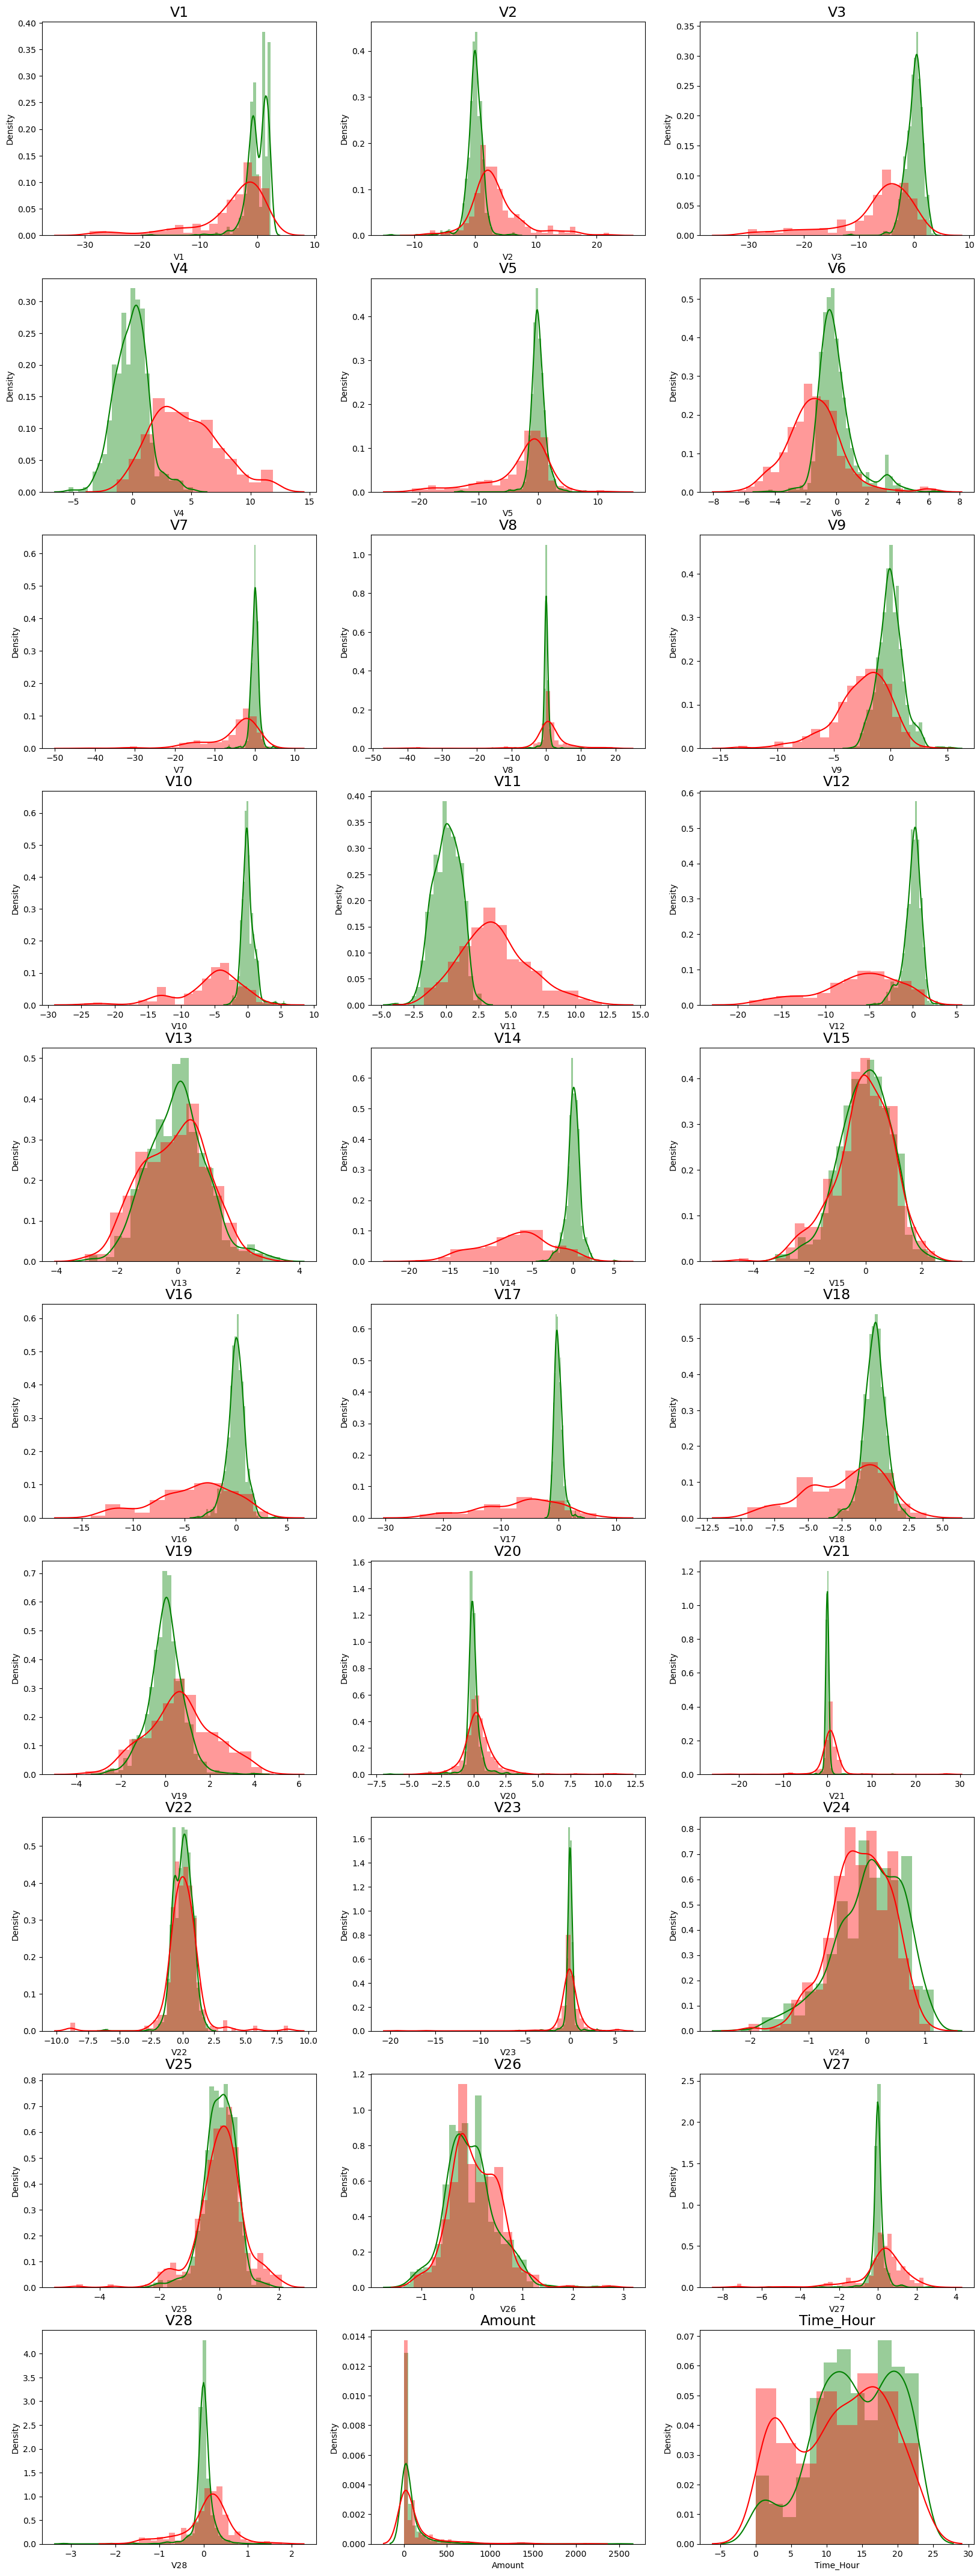

In [40]:
# plot the histogram of a variable from the dataset to see the skewness
column_list = list(features_train.columns.values)
normal_data = new_data.Class == 0
fraud_data = new_data.Class == 1
plt.figure(figsize=(20, 60))
for n, col in enumerate(column_list):
    plt.subplot(11,3,n+1)
    sns.distplot(new_data[col][normal_data], color='green')
    sns.distplot(new_data[col][fraud_data], color='red')
    plt.title(col, fontsize=17)
plt.show()

In [41]:
power_t = PowerTransformer()
power_t.fit(train_X)                       ## Fit the PT on training data
train_X_pt = power_t.transform(train_X)    ## Then apply on all data
test_X_pt = power_t.transform(test_X)

In [42]:
train_X_pt_df = pd.DataFrame(data=train_X_pt,   columns=column_list)
test_X_pt_df = pd.DataFrame(data=test_X_pt,   columns=column_list)

In [43]:
new_data.shape

(1099, 31)

In [44]:
train_X_pt_df.shape

(879, 30)

In [80]:
new_data_2 = new_data.copy().reset_index()
new_data_2_target = new_data_2['Class']
new_data_2_to_pt = new_data_2.drop('Class', axis=1)

In [85]:
new_data_2_index = new_data_2['index']

In [86]:
new_data_pt = power_t.fit_transform(new_data_2_to_pt)

In [87]:
new_data_pt_df = pd.DataFrame(data=new_data_pt, columns=new_data_2_to_pt.columns)

In [88]:
new_data_pt_df

,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-0.227007,0.854173,-0.198614,0.564299,-0.160215,0.017710,-0.033910,0.231238,-0.144205,0.155967,...,-0.176023,-0.631972,0.104933,0.564140,0.209170,0.216467,-0.240985,-0.106267,-1.139258,0.914247
1,1.091024,1.529324,-0.316484,-0.425484,-0.322243,0.514618,-0.301678,0.794529,-0.239603,0.312439,...,0.029055,0.647921,-0.251749,-0.922640,0.893735,-0.847389,-0.264380,-0.317386,0.702260,0.428186
2,0.622025,0.007855,-0.331714,0.500479,-1.122693,0.944909,2.744137,-0.148296,0.177787,-0.433306,...,0.070065,0.917626,-0.404985,1.573444,0.413154,1.031370,-0.025838,0.066320,-0.027556,-0.526399
3,-1.688969,0.727238,-0.466002,1.070293,-0.260932,-0.105339,0.902557,-0.160291,-0.007977,2.199163,...,-0.209834,-0.344049,0.123672,-0.557981,-0.252356,1.784017,-0.248530,-0.153325,-0.026276,-1.296603
4,-0.360786,1.080384,-0.561892,-0.152329,-1.444151,0.905430,2.106921,-0.178151,0.086548,-0.183700,...,-0.043316,0.004655,-0.108137,2.190245,1.029930,-0.351669,-0.193298,-0.109687,-0.624700,0.589642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1.497444,1.681685,-0.589883,-0.158351,-0.764370,-0.061465,0.176994,-0.177818,-0.092454,0.227469,...,0.045641,0.778573,0.129775,1.133548,-0.418453,-0.230021,-0.178005,-0.172755,-0.027556,1.405006
1095,1.529822,-0.549976,0.102082,-0.798159,0.271340,-0.350144,-0.920987,-0.114366,0.067545,-0.670092,...,0.263879,-0.357512,0.716562,-0.589170,0.801652,1.522679,0.184519,0.274677,1.484656,1.405006
1096,1.532257,-0.215674,0.102306,-0.402045,-0.173256,-0.220469,0.371060,-0.480572,0.214970,-0.048005,...,0.252041,0.780750,0.184812,-0.030556,-1.183596,0.969747,0.316415,0.407237,0.672032,1.569532
1097,1.540724,-0.782178,-0.073054,-0.918482,0.292290,-0.133563,-1.561466,-0.474459,0.170958,-0.494690,...,0.177295,-0.309132,-0.491389,-0.408116,-0.612988,1.209801,1.099870,-0.771871,1.252922,1.569532


In [89]:
pted_new_data = pd.concat([new_data_pt_df,new_data_2_target], axis=1)

In [91]:
pted_new_data = pted_new_data.drop('index', axis=1)

In [95]:
pted_new_data = pted_new_data.set_index(new_data_2_index)

In [96]:
pted_new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour,Class
index,,,,,,,,,,,,,,,,,,,,,
103075,0.854173,-0.198614,0.564299,-0.160215,0.017710,-0.033910,0.231238,-0.144205,0.155967,0.402645,...,-0.631972,0.104933,0.564140,0.209170,0.216467,-0.240985,-0.106267,-1.139258,0.914247,0
230070,1.529324,-0.316484,-0.425484,-0.322243,0.514618,-0.301678,0.794529,-0.239603,0.312439,0.395819,...,0.647921,-0.251749,-0.922640,0.893735,-0.847389,-0.264380,-0.317386,0.702260,0.428186,0
180818,0.007855,-0.331714,0.500479,-1.122693,0.944909,2.744137,-0.148296,0.177787,-0.433306,0.673263,...,0.917626,-0.404985,1.573444,0.413154,1.031370,-0.025838,0.066320,-0.027556,-0.526399,0
11964,0.727238,-0.466002,1.070293,-0.260932,-0.105339,0.902557,-0.160291,-0.007977,2.199163,0.051283,...,-0.344049,0.123672,-0.557981,-0.252356,1.784017,-0.248530,-0.153325,-0.026276,-1.296603,0
92291,1.080384,-0.561892,-0.152329,-1.444151,0.905430,2.106921,-0.178151,0.086548,-0.183700,0.761644,...,0.004655,-0.108137,2.190245,1.029930,-0.351669,-0.193298,-0.109687,-0.624700,0.589642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276071,1.681685,-0.589883,-0.158351,-0.764370,-0.061465,0.176994,-0.177818,-0.092454,0.227469,0.487051,...,0.778573,0.129775,1.133548,-0.418453,-0.230021,-0.178005,-0.172755,-0.027556,1.405006,1
279863,-0.549976,0.102082,-0.798159,0.271340,-0.350144,-0.920987,-0.114366,0.067545,-0.670092,-1.057413,...,-0.357512,0.716562,-0.589170,0.801652,1.522679,0.184519,0.274677,1.484656,1.405006,1
280149,-0.215674,0.102306,-0.402045,-0.173256,-0.220469,0.371060,-0.480572,0.214970,-0.048005,-0.668475,...,0.780750,0.184812,-0.030556,-1.183596,0.969747,0.316415,0.407237,0.672032,1.569532,1


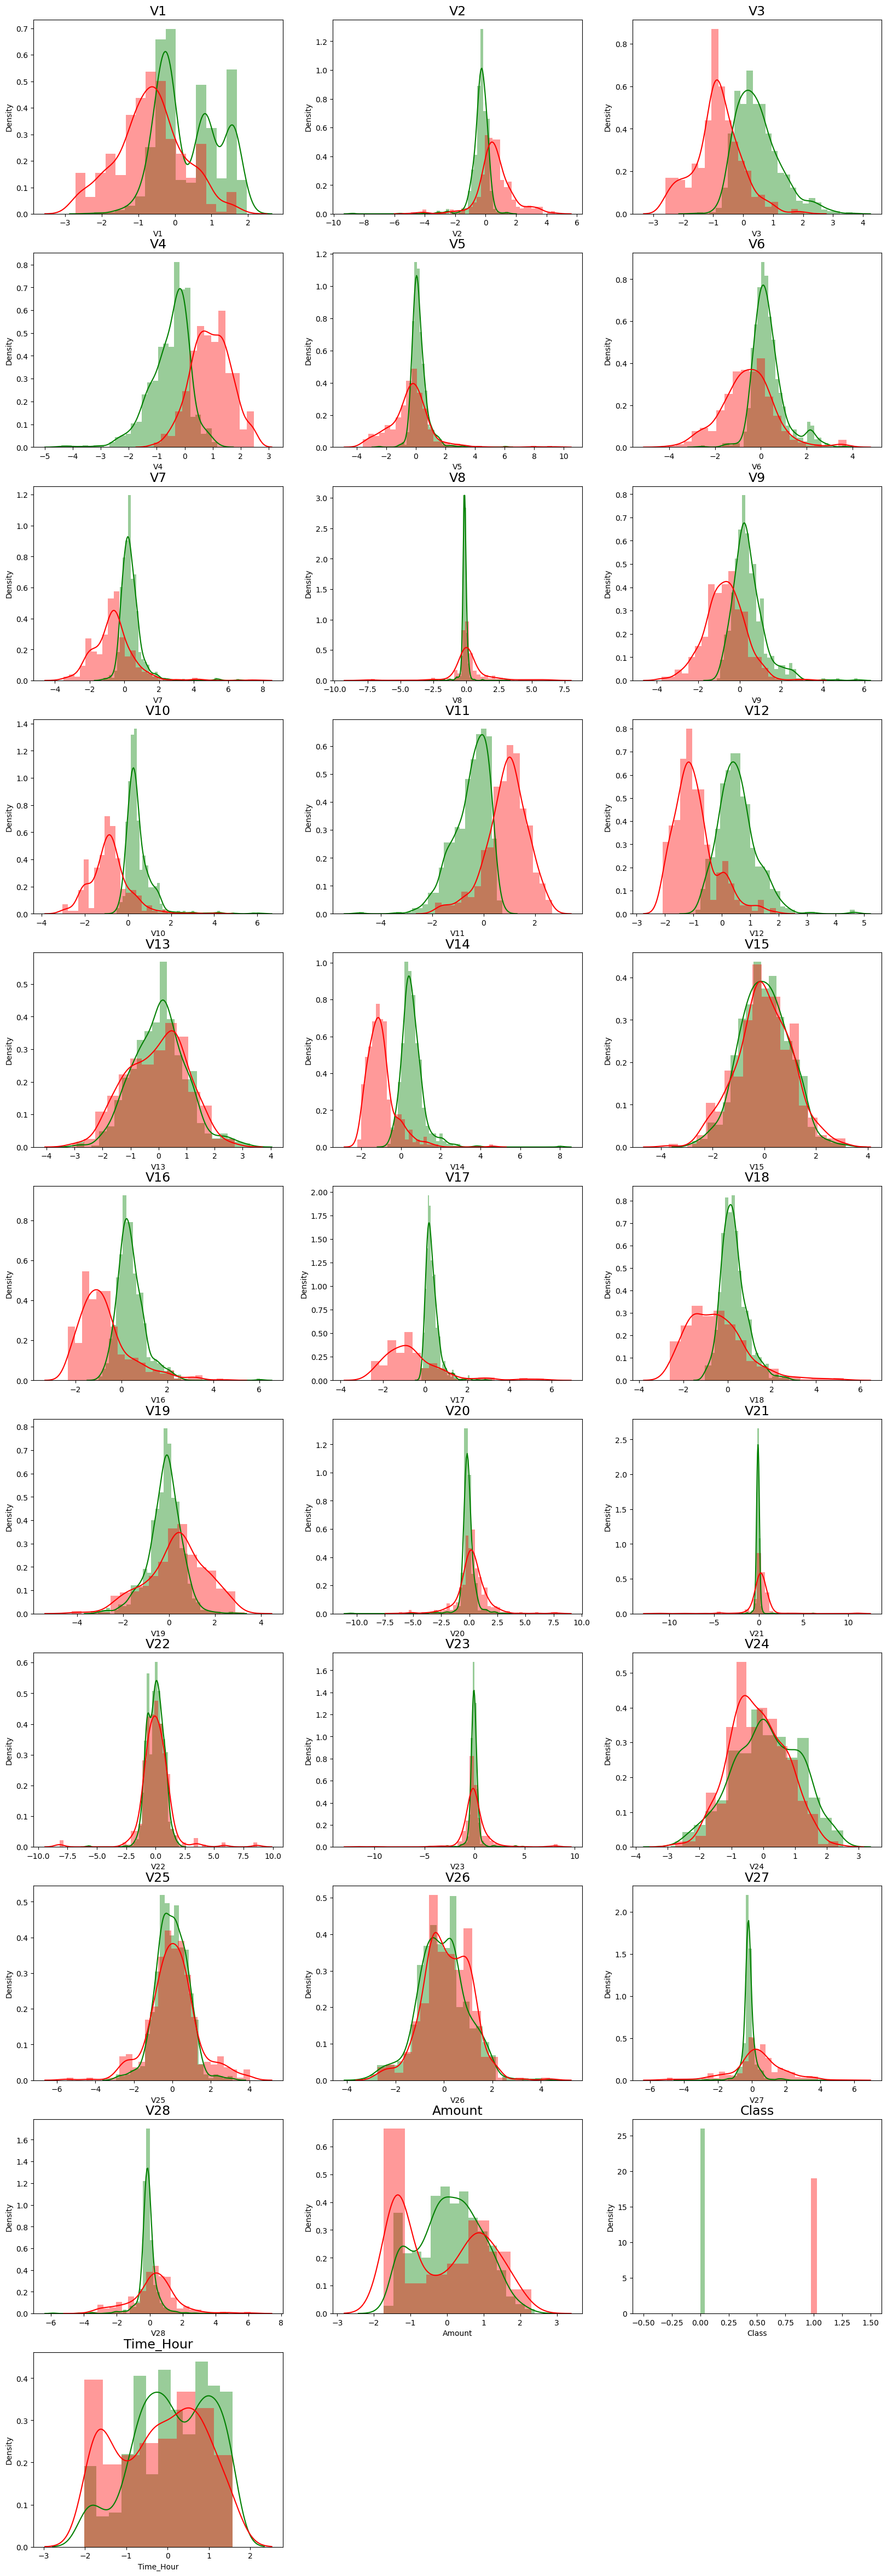

In [97]:
column_list_2 = list(new_data.columns.values)
normal_data_2 = pted_new_data.Class == 0
fraud_data_2 = pted_new_data.Class == 1
plt.figure(figsize=(20, 60))
for n, col in enumerate(column_list_2):
    plt.subplot(11,3,n+1)
    sns.distplot(pted_new_data[col][normal_data_2], color='green')
    sns.distplot(pted_new_data[col][fraud_data_2], color='red')
    plt.title(col, fontsize=17)
plt.show()

# Training Models

In [104]:
knn_class = KNeighborsClassifier()
tree_class = DecisionTreeClassifier()
forest_class = RandomForestClassifier()
svc_class = SVC()
ada_class = AdaBoostClassifier()
sgd_class = SGDClassifier()
ridge_class = RidgeClassifier()
log_class = LogisticRegression()
linSVC_class = LinearSVC()
gbc_class = GradientBoostingClassifier()
xgb_class = XGBClassifier()
lgbm_class = LGBMClassifier(verbosity=-1)

models_list = {
               'KNeighbors_Classifier':knn_class,
               'Decision_Tree':tree_class, 
               'Random_Forest':forest_class,
               'AdaBoost_Classifier': ada_class,
               'SVC_Classifier':svc_class,
               'SGD_Classifier':sgd_class, 
               'Ridge_Classification':ridge_class,
               'Logistic_Regression':log_class, 
               'LinearSVC':linSVC_class,
               'GradientBoosting_Classification':gbc_class, 
               'XGBoost_Classification':xgb_class, 
               'LightGBM_Classification':lgbm_class}

In [105]:
df_results = pd.DataFrame(columns=['model','cv_method','basic_accuracy','accuracy_mean','accuracy_std','parameters'])

In [106]:
def basic_models(df_results,datasetname ,models, cv_method, features_train, target_train):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score
    
    scoring = 'accuracy'
    cv = 10
    df_final = df_results.copy()
    for key, model in models.items():
        
        if cv_method == 'cross_val_score':
            train_X, test_X, train_y, test_y = train_test_split(features_train, target_train,test_size=0.1 ,random_state=1)
            tm = model.fit(train_X, train_y)
            tm_predict = tm.predict(test_X)
            prediction = accuracy_score(test_y, tm_predict)
            
            model_cv = cross_val_score(model, train_X, train_y,
                                       scoring=scoring, cv=cv)
            score = model_cv
            df_created = pd.DataFrame(
            {'datasetname': datasetname,
             'model': key,
             'cv_method': cv_method,
             'basic_accuracy': [prediction],
             'accuracy_mean': score.mean(),
             'accuracy_std': score.std(),
             'parameters': 'None'})
            
            df_full_results = pd.concat([df_results,df_created], axis=0, ignore_index=True)
            
        if cv_method == 'kfold':
            predictions = []
            accu = []
            kf = KFold(n_splits=10,shuffle=True ,random_state=12)
            for train_index, test_index in kf.split(features_train):
                train_X, test_X = features_train.iloc[train_index], features_train.iloc[test_index]
                train_y, test_y = target_train.iloc[train_index], target_train.iloc[test_index]
                
                tm = model.fit(train_X, train_y)
                tm_predict = tm.predict(test_X)
                prediction = accuracy_score(test_y, tm_predict)
                accu.append(prediction)
                predictions.append(prediction)
                
                df_created = pd.DataFrame(
                {'datasetname': datasetname,
                 'model': key,
                 'cv_method': cv_method,
                 'basic_accuracy': [np.max(predictions)],
                 'accuracy_mean': np.mean(accu),
                 'accuracy_std': np.std(accu),
                 'parameters': 'None'})

                df_full_results = pd.concat([df_results,df_created], axis=0, ignore_index=True)
            
        if cv_method == 'repeatedkfold':
            predictions = []
            accu = []
            rkf = RepeatedKFold(n_splits=10, random_state=12)
            for train_index, test_index in rkf.split(features_train):
                train_X, test_X = features_train.iloc[train_index], features_train.iloc[test_index]
                train_y, test_y = target_train.iloc[train_index], target_train.iloc[test_index]
                
                tm = model.fit(train_X, train_y)
                tm_predict = tm.predict(test_X)
                prediction = accuracy_score(test_y, tm_predict)
                accu.append(prediction)
                predictions.append(prediction)
                
                df_created = pd.DataFrame(
                {'datasetname': datasetname,
                 'model': key,
                 'cv_method': cv_method,
                 'basic_accuracy': [np.max(predictions)],
                 'accuracy_mean': np.mean(accu),
                 'accuracy_std': np.std(accu),
                 'parameters': 'None'})

                df_full_results = pd.concat([df_results,df_created], axis=0, ignore_index=True)
        
        if cv_method == 'stratifiedkfold':
            predictions = []
            accu = []
            skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
            for train_index, test_index in skf.split(features_train, target_train):
                train_X, test_X = features_train.iloc[train_index], features_train.iloc[test_index]
                train_y, test_y = target_train.iloc[train_index], target_train.iloc[test_index]
                
                tm = model.fit(train_X, train_y)
                tm_predict = tm.predict(test_X)
                prediction = accuracy_score(test_y, tm_predict)
                accu.append(prediction)
                predictions.append(prediction)
                
                df_created = pd.DataFrame(
                {'datasetname': datasetname,
                 'model': key,
                 'cv_method': cv_method,
                 'basic_accuracy': [np.max(predictions)],
                 'accuracy_mean': np.mean(accu),
                 'accuracy_std': np.std(accu),
                 'parameters': 'None'})

                df_full_results = pd.concat([df_results,df_created], axis=0, ignore_index=True)
        
        if cv_method == 'shufflesplit':
            predictions = []
            accu = []
            shs = ShuffleSplit(n_splits=10, test_size=0.25, random_state=12)
            for train_index, test_index in shs.split(features_train):
                train_X, test_X = features_train.iloc[train_index], features_train.iloc[test_index]
                train_y, test_y = target_train.iloc[train_index], target_train.iloc[test_index]
                
                tm = model.fit(train_X, train_y)
                tm_predict = tm.predict(test_X)
                prediction = accuracy_score(test_y, tm_predict)
                accu.append(prediction)
                predictions.append(prediction)
                
                df_created = pd.DataFrame(
                {'datasetname': datasetname,
                 'model': key,
                 'cv_method': cv_method,
                 'basic_accuracy': [np.max(predictions)],
                 'accuracy_mean': np.mean(accu),
                 'accuracy_std': np.std(accu),
                 'parameters': 'None'})

                df_full_results = pd.concat([df_results,df_created], axis=0, ignore_index=True)
        
        
        
        df_row = pd.DataFrame(
            {'datasetname': [df_full_results.loc[0]['datasetname']] ,
             'model': [df_full_results.loc[0]['model']] ,
             'cv_method': [df_full_results.loc[0]['cv_method']],
             'basic_accuracy': [df_full_results['basic_accuracy'].mean()],
             'accuracy_mean': [df_full_results.loc[0]['accuracy_mean']],
             'accuracy_std': [df_full_results.loc[0]['accuracy_std']],
             'parameters': 'None'})
        
        
        df_final = pd.concat([df_final,df_row], axis=0, ignore_index=True)
    return df_final

In [107]:
#evaluation methods
eval_methods = ['cross_val_score',
                'kfold',
                'repeatedkfold',
                'stratifiedkfold',
                'shufflesplit']

In [111]:
#models trainer
def train_models(df_results, dataframes_dict, eval_methods, models_list):

    final_result = []

    for key,value in dataframes_dict.items():
        features_train = value.drop('Class', axis=1)
        target_train = value['Class']
        print(f'training data: {key}')
        for method in eval_methods:
            print(f'training method: {method}')
            result = basic_models(df_results,key, models_list, method, features_train, target_train)
            final_result.append(result)
            print('done method')
        print('done data')

    final_data_of_trained_models = pd.concat(final_result, axis=0)
    return final_data_of_trained_models

In [109]:
#dataframes dict
df_train = new_data.copy()
df_train_pt = pted_new_data.copy()

dataframes_dict = {'df_train':df_train,
                   'df_train_pt':df_train_pt}

In [115]:
# df_models_trained = train_models(df_results,dataframes_dict,eval_methods,models_list)
# df_models_trained.to_csv('./v1_trained_models_no_params_df.csv')

In [116]:
df_models_trained_no_params = pd.read_csv('v1_trained_models_no_params_df.csv', index_col=0)
df_models_trained_no_params.sort_values(by='accuracy_mean', ascending=False).head(20)

,model,cv_method,basic_accuracy,accuracy_mean,accuracy_std,parameters,datasetname
9,GradientBoosting_Classification,shufflesplit,0.967273,0.958545,0.007662,None,df_train_pt
9,GradientBoosting_Classification,stratifiedkfold,0.981818,0.958123,0.014858,None,df_train
9,GradientBoosting_Classification,shufflesplit,0.970909,0.957818,0.009228,None,df_train
9,GradientBoosting_Classification,stratifiedkfold,0.981818,0.957214,0.014771,None,df_train_pt
11,LightGBM_Classification,cross_val_score,0.936364,0.956514,0.023072,None,df_train_pt
2,Random_Forest,shufflesplit,0.963636,0.956364,0.007628,None,df_train
2,Random_Forest,shufflesplit,0.963636,0.956000,0.009120,None,df_train_pt
3,AdaBoost_Classifier,shufflesplit,0.970909,0.955636,0.010259,None,df_train
3,AdaBoost_Classifier,shufflesplit,0.970909,0.955636,0.010259,None,df_train_pt
9,GradientBoosting_Classification,kfold,0.990909,0.955405,0.021709,None,df_train_pt


***Train models with params***

In [122]:
final_models_list = {'XGBoost_Classification':xgb_class,
                     'LightGBM_Classification':lgbm_class, 
                     'GradientBoosting_Classification':gbc_class,
                     'Random_Forest':forest_class}

In [123]:
final_models_with_params_search = {
    'XGBoost_Classification':{'verbosity':[0],
                              'booster':['gbtree','gblinear','dart'],
                             },
    
    'LightGBM_Classification':{'boosting':['gbdt','dart', 'rf'],
                               'n_estimators':[100,200,300],
                               'n_jobs':[-1],
                               'class_weight':[None,'balanced'],
                               'learning_rate':[0.1,0.05,0.2],
                               },
    
    'GradientBoosting_Classification':{'loss':['log_loss','exponential'],
                                       'learning_rate':[0.05,0.1,0.2],
                                       'n_estimators':[100,200,400],
                                       'subsample':[0.1,0.5,1.0],
                                       'criterion':['friedman_mse','squared_error'],
                                       'max_features':['sqrt','log2',None]},
    
    'Random_Forest':{'n_estimators':[10,50,100,200,400],
                     'criterion':['gini','entropy','log_loss'],
                     'max_features':['sqrt','log2', None],
                     'n_jobs':[-1],
                     'class_weight':['balanced','balanced_subsample', None]}
}

***GridSearch for parameters***

In [126]:
# my_dict = dict()
# for name,value in dataframes_dict.items():
#     features_train = value.drop('Class', axis=1)
#     target_train = value['Class']
#     print(f'training data: {name}')
#     for key,model in final_models_list.items():
#         gridsearch = GridSearchCV(model,final_models_with_params_search[key], cv=5,scoring='accuracy',verbose=0)
#         best_model = gridsearch.fit(features_train, target_train)
#         print(f'{key}:{best_model.best_estimator_}')
#         my_dict[key]=(name, best_model.best_estimator_)
# my_dict

In [125]:
# training data: df_train
    
# XGBoost_Classification:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
#               colsample_bylevel=None, colsample_bynode=None,
#               colsample_bytree=None, device=None, early_stopping_rounds=None,
#               enable_categorical=False, eval_metric=None, feature_types=None,
#               gamma=None, grow_policy=None, importance_type=None,
#               interaction_constraints=None, learning_rate=None, max_bin=None,
#               max_cat_threshold=None, max_cat_to_onehot=None,
#               max_delta_step=None, max_depth=None, max_leaves=None,
#               min_child_weight=None, missing=nan, monotone_constraints=None,
#               multi_strategy=None, n_estimators=None, n_jobs=None,
#               num_parallel_tree=None, random_state=None, ...)

# LightGBM_Classification:LGBMClassifier(boosting='dart', learning_rate=0.2, n_estimators=200, n_jobs=-1,
#                verbosity=-1)

# GradientBoosting_Classification:GradientBoostingClassifier(criterion='squared_error', loss='exponential',
#                            max_features='log2')

# Random_Forest:RandomForestClassifier(max_features=None, n_estimators=10, n_jobs=-1)

In [127]:
# training data: df_train_pt
# XGBoost_Classification:XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
#               colsample_bylevel=None, colsample_bynode=None,
#               colsample_bytree=None, device=None, early_stopping_rounds=None,
#               enable_categorical=False, eval_metric=None, feature_types=None,
#               gamma=None, grow_policy=None, importance_type=None,
#               interaction_constraints=None, learning_rate=None, max_bin=None,
#               max_cat_threshold=None, max_cat_to_onehot=None,
#               max_delta_step=None, max_depth=None, max_leaves=None,
#               min_child_weight=None, missing=nan, monotone_constraints=None,
#               multi_strategy=None, n_estimators=None, n_jobs=None,
#               num_parallel_tree=None, random_state=None, ...)
    
# LightGBM_Classification:LGBMClassifier(boosting='gbdt', learning_rate=0.05, n_estimators=300, n_jobs=-1,
#                verbosity=-1)

# GradientBoosting_Classification:GradientBoostingClassifier(learning_rate=0.05, max_features='sqrt',
#                            n_estimators=200)

# Random_Forest:RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
#                        max_features=None, n_estimators=50, n_jobs=-1)

***Prepare final models with params for training data***

In [129]:
#for data without pt

xgb_class_params = XGBClassifier(booster='gbtree', n_jobs=-1)
lgbm_class_params = LGBMClassifier(boosting='dart', learning_rate=0.2, 
                                   n_estimators=200, n_jobs=-1, verbosity=-1)
gbc_class_params = GradientBoostingClassifier(criterion='squared_error', loss='exponential', 
                                              max_features='log2')

forest_class_params = RandomForestClassifier(max_features=None, n_estimators=10, n_jobs=-1)
vot_class = VotingClassifier([('xgb',xgb_class_params),
                              ('gbc',gbc_class_params),
                              ('forest',forest_class_params),
                              ('lgbm',lgbm_class_params)])

final_models_list_with_params = {
                     'XGBoost_Classification':xgb_class_params,
                     'LightGBM_Classification':lgbm_class_params, 
                     'GradientBoosting_Classification':gbc_class_params,
                     'Random_Forest':forest_class_params,
                     'Voting_Classifier': vot_class}

In [130]:
#for data with pt

#for data without pt

xgb_class_params_pt = XGBClassifier(booster='gbtree', 
                                 n_jobs=-1)

lgbm_class_params_pt = LGBMClassifier(boosting='gbdt', 
                                   learning_rate=0.05, 
                                   n_estimators=300, 
                                   n_jobs=-1,
                                   verbosity=-1)

gbc_class_params_pt = GradientBoostingClassifier(learning_rate=0.05, 
                                              max_features='sqrt', 
                                              n_estimators=200)

forest_class_params_pt = RandomForestClassifier(class_weight='balanced_subsample', 
                                             criterion='entropy', 
                                             max_features=None, 
                                             n_estimators=50, 
                                             n_jobs=-1)

vot_class_pt = VotingClassifier([('xgb',xgb_class_params_pt),
                              ('gbc',gbc_class_params_pt),
                              ('forest',forest_class_params_pt),
                              ('lgbm',lgbm_class_params_pt)])

final_models_list_with_params_pt = {
                     'XGBoost_Classification':xgb_class_params_pt,
                     'LightGBM_Classification':lgbm_class_params_pt, 
                     'GradientBoosting_Classification':gbc_class_params_pt,
                     'Random_Forest':forest_class_params_pt,
                     'Voting_Classifier': vot_class_pt}

In [136]:
# df_models_trained_with_params = train_models(df_results,dataframes_dict,eval_methods,final_models_list_with_params)
# df_models_trained_with_params.to_csv('./v1_trained_models_with_params_df.csv')

In [137]:
df_models_trained_with_params = pd.read_csv('v1_trained_models_with_params_df.csv', index_col=0)
df_models_trained_with_params.sort_values(by='accuracy_mean', ascending=False).head(20)

,model,cv_method,basic_accuracy,accuracy_mean,accuracy_std,parameters,datasetname
4,Voting_Classifier,shufflesplit,0.970909,0.957818,0.006744,None,df_train_pt
4,Voting_Classifier,shufflesplit,0.967273,0.956727,0.008364,None,df_train
2,GradientBoosting_Classification,shufflesplit,0.970909,0.956364,0.010664,None,df_train_pt
2,GradientBoosting_Classification,shufflesplit,0.967273,0.956364,0.008758,None,df_train
2,GradientBoosting_Classification,stratifiedkfold,0.963636,0.956314,0.007995,None,df_train
1,LightGBM_Classification,shufflesplit,0.970909,0.956000,0.007354,None,df_train_pt
2,GradientBoosting_Classification,stratifiedkfold,0.972727,0.955413,0.009496,None,df_train_pt
4,Voting_Classifier,kfold,0.990909,0.955396,0.022485,None,df_train
2,GradientBoosting_Classification,cross_val_score,0.936364,0.954494,0.021794,None,df_train
4,Voting_Classifier,cross_val_score,0.936364,0.954494,0.021794,None,df_train


In [133]:
# df_models_trained_with_params_pt = train_models(df_results,dataframes_dict,eval_methods,final_models_list_with_params_pt)
# df_models_trained_with_params_pt.to_csv('./v1_trained_models_with_params_pt_df.csv')

training data: df_train
training method: cross_val_score
done method
training method: kfold
done method
training method: repeatedkfold
done method
training method: stratifiedkfold
done method
training method: shufflesplit
done method
done data
training data: df_train_pt
training method: cross_val_score
done method
training method: kfold
done method
training method: repeatedkfold
done method
training method: stratifiedkfold
done method
training method: shufflesplit
done method
done data


In [139]:
df_models_trained_with_params_pt = pd.read_csv('v1_trained_models_with_params_pt_df.csv', index_col=0)
df_models_trained_with_params_pt.sort_values(by='accuracy_mean', ascending=False).head(20)

,model,cv_method,basic_accuracy,accuracy_mean,accuracy_std,parameters,datasetname
2,GradientBoosting_Classification,stratifiedkfold,0.972727,0.959041,0.010232,None,df_train
4,Voting_Classifier,shufflesplit,0.970909,0.958182,0.009655,None,df_train
4,Voting_Classifier,shufflesplit,0.970909,0.957818,0.008000,None,df_train_pt
2,GradientBoosting_Classification,shufflesplit,0.967273,0.957091,0.007593,None,df_train_pt
2,GradientBoosting_Classification,shufflesplit,0.970909,0.956727,0.007705,None,df_train
1,LightGBM_Classification,shufflesplit,0.970909,0.956000,0.008041,None,df_train
3,Random_Forest,shufflesplit,0.970909,0.954909,0.008324,None,df_train_pt
2,GradientBoosting_Classification,repeatedkfold,1.000000,0.954771,0.019542,None,df_train
1,LightGBM_Classification,shufflesplit,0.970909,0.954545,0.006351,None,df_train_pt
1,LightGBM_Classification,cross_val_score,0.936364,0.954494,0.024442,None,df_train_pt


In [197]:
test_data = df_test.copy()

In [198]:
Delta_Time_Test = pd.to_timedelta(test_data['Time'], unit='s')
test_data['Time_Hour'] = (Delta_Time_Test.dt.components.hours).astype(int)

In [199]:
test_data_pt = power_t.fit_transform(test_data)
test_data_pt_df = pd.DataFrame(data=test_data_pt, columns=test_data.columns)

In [200]:
test_data_pt_df = test_data_pt_df.drop(['Time','Class'], axis=1).set_index(test_data.index)
test_data_pt_df = pd.concat([test_data_pt_df,test_data['Class']],axis=1)
test_data_pt_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour,Class
214164,1.604559,-1.042111,-0.260794,-1.325735,-1.167688,0.435338,-1.575639,0.146914,-0.850120,1.467755,...,0.344636,0.493149,0.494836,-0.982357,-0.489048,0.128172,-0.092245,0.074654,-0.060010,0
10783,-1.771023,4.043739,-4.099358,3.401942,-3.501132,-3.256871,-6.744068,3.780322,-3.473669,-13.166312,...,-0.479501,-0.046394,-0.129387,-0.048319,-0.584380,5.801588,2.041933,0.838152,-1.534053,0
228456,-0.812419,0.289093,1.410776,0.076699,-0.058060,0.653600,0.633865,0.198394,-0.233962,-0.518824,...,0.924985,-0.518764,1.163992,1.321610,-1.066772,-0.085738,0.205387,1.061674,0.301016,0
253376,1.347921,-0.225261,-0.410045,0.815521,-0.277919,0.117295,-0.527983,0.075174,0.741307,0.426527,...,1.088846,0.123130,-0.908167,-0.187924,-1.203877,0.106828,-0.136899,-2.013062,0.859937,0
243213,-0.784314,0.193334,0.453751,-2.079715,0.918431,1.195499,0.150646,0.659883,0.400819,-0.655421,...,0.923991,-0.333298,-1.368261,-0.475955,2.115670,1.006442,0.737887,-0.317382,0.671446,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12688,0.730374,0.181195,-0.268029,0.431876,0.431268,0.300366,-0.081272,-0.148005,1.216833,-0.642038,...,-1.533173,-0.018986,-2.041297,0.586386,0.453189,-0.105146,0.037350,-1.130372,-1.385750,0
132126,0.114232,-1.164481,-0.212370,-0.208182,-1.204998,-0.728085,0.051745,-0.373656,-0.643753,0.439027,...,-1.645412,-0.380379,0.617804,-0.210849,1.711215,-0.383108,0.278168,1.712552,1.437512,0
75040,0.677271,-0.153727,0.084811,-0.169564,-0.265664,-0.125035,-0.214964,-0.094024,0.125833,-0.021362,...,-0.491891,-0.047895,-0.539256,0.341829,1.761654,-0.209753,0.003756,-0.009469,0.119272,0
120145,-1.074452,0.287145,0.764768,-1.473892,-1.000025,0.320235,-0.782720,1.006710,-1.214475,0.038100,...,1.924541,-0.425233,-0.517013,-0.046287,-0.377189,-1.610328,-0.142601,0.501725,1.243044,0


In [215]:
test_data = test_data.drop('Time', axis=1)

In [216]:
final_train_features = df_train.drop('Class', axis=1)
final_train_target = df_train['Class']

final_test_features = test_data.drop('Class', axis=1)
final_test_target = test_data['Class']

In [217]:
final_model_gbc = gbc_class_params_pt
final_model_vot = vot_class_pt

In [218]:
final_model_gbc.fit(final_train_features,final_train_target)

GradientBoostingClassifier(learning_rate=0.05, max_features='sqrt',
                           n_estimators=200)

In [219]:
final_model_vot.fit(final_train_features,final_train_target)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            random_state=None, ...)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_features='sqrt',
                                                         n_estimators=200)),
                             ('forest',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_features=None,
                                                     n_estimators=50,
                                                     n_jobs=-1)),
                             ('lgbm',
                              LGBMClassifier(boosting='gbdt',
                                             learning_rate=0.05,
                                             n_estimators=300, n_jobs=-1,
                                             verbosity=-1))])

In [220]:
predictions_gbc = final_model_gbc.predict(final_test_features)
predictions_vot = final_model_vot.predict(final_test_features)

In [221]:
model_score_gbc = accuracy_score(final_test_target, predictions_gbc)
model_score_vot = accuracy_score(final_test_target, predictions_vot)

In [223]:
#best results we get from models with parameters searched on power_transformed data
#used on not power transformed data 
#think about it
print('gbc score:',model_score_gbc)
print('vot score:',model_score_vot)

gbc score: 0.9821456786222152
vot score: 0.9863941995400362


# Feature Selection